In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
cdf = pd.read_csv("./data/consumption.csv", sep=",")
pdf = pd.read_csv("./data/production.csv", sep=",")

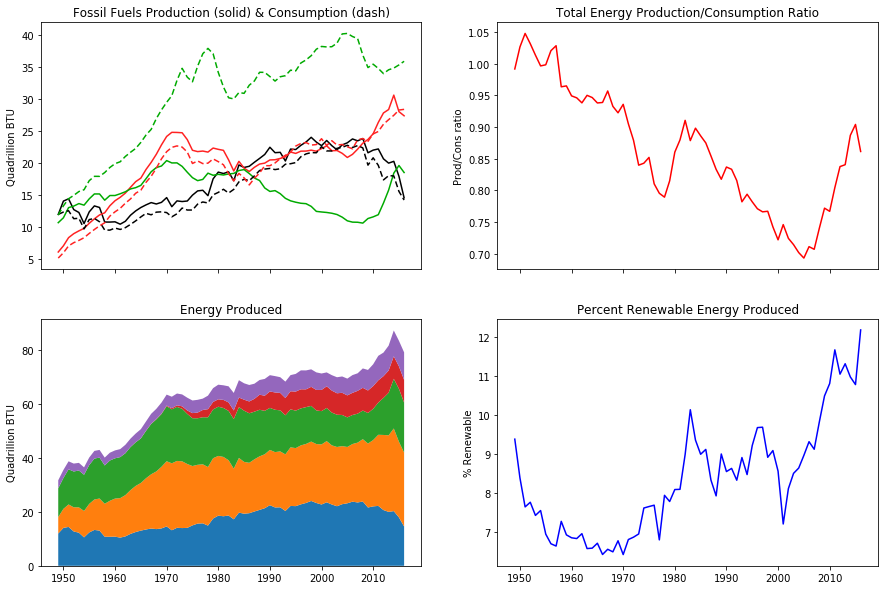

In [25]:
fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2,2, sharex=True, figsize=(15,10))

x = cdf['Year']

coal_black = '#000000';
gas_red = '#ff2222';
oil_green = '#00aa00';

# Axis 1
coal_production = pdf.iloc[:,1]
gas_production = pdf.iloc[:,2]
oil_production = pdf.iloc[:,3]

coal_consumption = cdf.iloc[:,1]
gas_consumption = cdf.iloc[:,2]
oil_consumption = cdf.iloc[:,3]
ax1.plot(x, coal_production, c=coal_black)
ax1.plot(x, gas_production, c=gas_red)
ax1.plot(x, oil_production, c=oil_green)

ax1.plot(x, coal_consumption, c=coal_black, dashes=[4, 2])
ax1.plot(x, gas_consumption, c=gas_red, dashes=[4, 2])
ax1.plot(x, oil_consumption, c=oil_green, dashes=[4, 2])

ax1.set_ylabel("Quadrillion BTU")

ax1.set_title("Fossil Fuels Production (solid) & Consumption (dash)")

# Axis 2
total_production = pdf.iloc[:,6]
total_consumption = cdf.iloc[:,6]

ratio = total_production / total_consumption

ax2.plot(x, ratio, c='red')

ax2.set_ylabel("Prod/Cons ratio")

ax2.set_title("Total Energy Production/Consumption Ratio")

# Axis 3
nuclear_production = pdf.iloc[:,4]
renewable_production = pdf.iloc[:,5]

ax3.stackplot(x, coal_production, gas_production, oil_production,\
    nuclear_production, renewable_production)

ax3.set_ylabel("Quadrillion BTU")

ax3.set_title("Energy Produced")

# Axis 4
percent_renewable = renewable_production / total_production

ax4.plot(x, percent_renewable, c='blue')

ax4.set_ylabel("% Renewable")
ax4.set_yticklabels(np.arange(6, 13, 1))

ax4.set_title("Percent Renewable Energy Produced")

plt.savefig('selected.png', dpi=500)
plt.show()